<a href="https://colab.research.google.com/github/Anusha-T8/LPG_SALES_FORECAST/blob/main/LPG_Modeldrivenmethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/total-liquefied-petroleum-gas-sales-quarterly.csv")

In [ ]:
del df['level_1']

In [ ]:
df.head()

,quarter,value
0,1994-Q1,29226.3
1,1994-Q2,38153.9
2,1994-Q3,39414.7
3,1994-Q4,37600.3
4,1995-Q1,34100.6


In [ ]:
df.shape

(102, 3)

In [ ]:
Quarter=['Q1','Q2','Q3','Q4']
n=df['quarter'][0]
n[5:]
df['Quarter']=0

In [ ]:
for i in range(102):
    n=df['quarter'][i]
    df['Quarter'][i]=n[5:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
dummy=pd.DataFrame(pd.get_dummies(df['Quarter']))
df1=pd.concat((df,dummy),axis=1)

In [ ]:
df1.head()

,quarter,value,Quarter,Q1,Q2,Q3,Q4
0,1994-Q1,29226.3,Q1,1,0,0,0
1,1994-Q2,38153.9,Q2,0,1,0,0
2,1994-Q3,39414.7,Q3,0,0,1,0
3,1994-Q4,37600.3,Q4,0,0,0,1
4,1995-Q1,34100.6,Q1,1,0,0,0


In [ ]:
t= np.arange(1,103)
df1['t']=t
df1['t_square']=df1['t']*df1['t']

In [ ]:
log_value=np.log(df1['value'])
df1['log_value']=log_value

In [ ]:
df1.head()

,quarter,value,Quarter,Q1,Q2,Q3,Q4,t,t_square,log_value
0,1994-Q1,29226.3,Q1,1,0,0,0,1,1,10.282824
1,1994-Q2,38153.9,Q2,0,1,0,0,2,4,10.549383
2,1994-Q3,39414.7,Q3,0,0,1,0,3,9,10.581894
3,1994-Q4,37600.3,Q4,0,0,0,1,4,16,10.534767
4,1995-Q1,34100.6,Q1,1,0,0,0,5,25,10.437070


In [ ]:
df1.to_excel("requiredforprediction.xlsx")

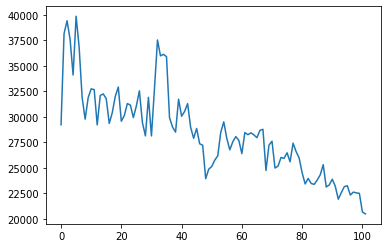

In [ ]:
df1.value.plot()

In [ ]:
Train=df1.head(81)
Test=df1.tail(21)

In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


LINEAR MODEL

In [ ]:
linear= smf.ols('value~t',data=Train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(Test['t'])))
rmselin=np.sqrt((np.mean(np.array(Test['value'])-np.array(predlin))**2))
rmselin

979.9593361509145

QUADRATIC MODEL

In [ ]:
quad=smf.ols('value~t+t_square',data=Train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(Test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(Test['value'])-np.array(predquad))**2))
rmsequad

2370.9543570670867

EXPONENTIAL MODEL

In [ ]:
expo=smf.ols('log_value~t',data=Train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(Test['t'])))
rmseexpo=np.sqrt(np.mean((np.array(Test['value'])-np.array(np.exp(predexp)))**2))
rmseexpo

1620.9259461530353

ADDITIVE SEASONALITY 

In [ ]:
additive= smf.ols('value~ Q1+Q2+Q3+Q4',data=Train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(Test[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(Test['value'])-np.array(predadd))**2))
rmseadd

6902.612572520001

ADDITIVE SEASONALITY WITH LINEAR TREND

In [ ]:
addlinear= smf.ols('value~t+Q1+Q2+Q3+Q4',data=Train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(Test[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(Test['value'])-np.array(predaddlinear))**2))
rmseaddlinear

1303.766907108997

ADDITIVE SEASONALITY WITH QUADRATIC TREND

In [ ]:
addquad=smf.ols('value~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(Test[['t','t_square','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(Test['value'])-np.array(predaddquad))**2))
rmseaddquad

2598.575351944335

MULTIPLICATIVE SEASONALITY

In [ ]:
mullin= smf.ols('log_value~t+Q1+Q2+Q3+Q4',data=Train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(Test[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(Test['value'])-np.array(np.exp(predmullin)))**2))
rmsemulin

1652.464094866996

MULTIPLICATIVE SEASONALITY WITH QUADRATIC TREND

In [ ]:
mul_quad= smf.ols('log_value~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(Test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(Test['value'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

2419.8544096619826

In [ ]:
Table={'Model':pd.Series(['rmselin','rmsequad','rmseexpo','rmseadd','rmseaddlinear','rmseaddquad','rmsemulin','rmse_mul_quad']),'Values':pd.Series([rmselin,rmsequad,rmseexpo,rmseadd,rmseaddlinear,rmseaddquad,rmsemulin,rmse_mul_quad])}
RMSE_Table=pd.DataFrame(Table)
RMSE_Table

,Model,Values
0,rmselin,979.959336
1,rmsequad,2370.954357
2,rmseexpo,1620.925946
3,rmseadd,6902.612573
4,rmseaddlinear,1303.766907
5,rmseaddquad,2598.575352
6,rmsemulin,1652.464095
7,rmse_mul_quad,2419.854410


In [ ]:
pred=pd.read_excel("/content/requiredforprediction.xlsx",index_col=0)

In [ ]:
pred.head()

,quarter,value,Quarter,Q1,Q2,Q3,Q4,t,t_square,log_value
82,2014-Q3,23965.3,Q3,0,0,1,0,83,6889,10.084362
83,2014-Q4,23474.8,Q4,0,0,0,1,84,7056,10.063683
84,2015-Q1,23384.8,Q1,1,0,0,0,85,7225,10.059842
85,2015-Q2,23808.7,Q2,0,1,0,0,86,7396,10.077806
86,2015-Q3,24311.7,Q3,0,0,1,0,87,7569,10.098713


Linear model is choosen as good fit for prediction

In [ ]:
final_pred=smf.ols('value~t',data=df1).fit()

In [ ]:
pred_new = pd.Series(linear.predict(pred))
pred_new

pred["forecasted_value"] = pd.Series(pred_new)

pred

,quarter,value,Quarter,Q1,Q2,Q3,Q4,t,t_square,log_value,forecasted_value
82,2014-Q3,23965.3,Q3,0,0,1,0,83,6889,10.084362,25018.723811
83,2014-Q4,23474.8,Q4,0,0,0,1,84,7056,10.063683,24905.248393
84,2015-Q1,23384.8,Q1,1,0,0,0,85,7225,10.059842,24791.772975
85,2015-Q2,23808.7,Q2,0,1,0,0,86,7396,10.077806,24678.297557
86,2015-Q3,24311.7,Q3,0,0,1,0,87,7569,10.098713,24564.822139
87,2015-Q4,25315.1,Q4,0,0,0,1,88,7744,10.139156,24451.346722
88,2016-Q1,23129.9,Q1,1,0,0,0,89,7921,10.048881,24337.871304
89,2016-Q2,23324.9,Q2,0,1,0,0,90,8100,10.057277,24224.395886
90,2016-Q3,23889.9,Q3,0,0,1,0,91,8281,10.081211,24110.920468
91,2016-Q4,23206.6,Q4,0,0,0,1,92,8464,10.052192,23997.445050
